<a href="https://colab.research.google.com/github/snghynn/stat_programming/blob/main/stat_programming_2_Pytorch_Derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.autograd as autograd
from autograd import grad

## Problem 1:

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$g(\beta_0, \beta_1)=\sum\limits_{i=1}^{20}(y_i-(\beta_0+\beta_1 x_i))^2$.

Answer the following questions.

In [ ]:
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [ ]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

1. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ without using autograd.

In [ ]:
# beta 지정
beta0 = 1.0
beta1 = 0.5

# beta0에 대한 grad 계산
grad_beta0_manual = -2 * torch.sum(Y - (beta0 + beta1 * X))
# beta1에 대한 grad 계산
grad_beta1_manual = -2 * torch.sum(X * (Y - (beta0 + beta1 * X)))

print(grad_beta0_manual)
print(grad_beta1_manual)

tensor(94.5796)
tensor(-159.6058)


In [ ]:
from numpy import True_
def lin_reg_ftn(x,y,betas):
  return(sum((y-(betas[0]+betas[1]*x))**2))

betas = torch.tensor([1.0, 0.5], requires_grad=True)
f = lin_reg_ftn(X, Y, betas)
f.backward()
betas.grad

tensor([  94.5796, -159.6058])

2. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd.


In [ ]:
params = (X, Y, betas)
torch.autograd.functional.jacobian(lin_reg_ftn, params)

(tensor([ 6.6452,  5.0753,  4.9977,  3.5725,  3.9022,  4.6601,  5.0622,  3.7432,
          2.4325,  2.7379,  2.0742,  1.3820, -0.5226, -0.0953,  3.1535,  0.8643,
          0.1463, -1.1107,  0.3088, -1.7395]),
 tensor([-13.2904, -10.1506,  -9.9954,  -7.1450,  -7.8044,  -9.3202, -10.1244,
          -7.4864,  -4.8650,  -5.4758,  -4.1484,  -2.7640,   1.0452,   0.1906,
          -6.3070,  -1.7286,  -0.2926,   2.2214,  -0.6176,   3.4790]),
 tensor([  94.5796, -159.6058]))

3. Reshape $X$ into the shape of $[20,1]$ and name it as $XX$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)


---



In [ ]:
# Reshape X into [20, 1]
XX = X.reshape(20, 1)
XX

tensor([[-3.0000e+00],
        [-2.7000e+00],
        [-2.4000e+00],
        [-2.1000e+00],
        [-1.8000e+00],
        [-1.5000e+00],
        [-1.2000e+00],
        [-9.0000e-01],
        [-6.0000e-01],
        [-3.0000e-01],
        [-2.3842e-08],
        [ 3.0000e-01],
        [ 6.0000e-01],
        [ 9.0000e-01],
        [ 1.2000e+00],
        [ 1.5000e+00],
        [ 1.8000e+00],
        [ 2.1000e+00],
        [ 2.4000e+00],
        [ 2.7000e+00]])

In [ ]:
params = (XX, Y.reshape(20,1),betas) #Y까지 reshape해서 X와 같은 형태로 만들기
torch.autograd.functional.jacobian(lin_reg_ftn, params)[-1]

tensor([[  94.5796, -159.6058]])

4. Stack $X$ and $Y$ to make $MY\_data1$ of shape $[20,2]$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [ ]:
# Stack X and Y to create MY_data1
MY_data1 = torch.stack((X, Y), dim=1)
MY_data1

tensor([[-3.0000e+00, -7.1452e+00],
        [-2.7000e+00, -5.4253e+00],
        [-2.4000e+00, -5.1977e+00],
        [-2.1000e+00, -3.6225e+00],
        [-1.8000e+00, -3.8022e+00],
        [-1.5000e+00, -4.4101e+00],
        [-1.2000e+00, -4.6622e+00],
        [-9.0000e-01, -3.1932e+00],
        [-6.0000e-01, -1.7325e+00],
        [-3.0000e-01, -1.8879e+00],
        [-2.3842e-08, -1.0742e+00],
        [ 3.0000e-01, -2.3200e-01],
        [ 6.0000e-01,  1.8226e+00],
        [ 9.0000e-01,  1.5453e+00],
        [ 1.2000e+00, -1.5535e+00],
        [ 1.5000e+00,  8.8570e-01],
        [ 1.8000e+00,  1.7537e+00],
        [ 2.1000e+00,  3.1607e+00],
        [ 2.4000e+00,  1.8912e+00],
        [ 2.7000e+00,  4.0895e+00]])

In [ ]:
# Define the values of beta0 and beta1
beta0 = torch.tensor(1.0, requires_grad=True)
beta1 = torch.tensor(0.5, requires_grad=True)

# Calculate the square loss using MY_data1
loss = torch.sum((MY_data1[:, 1] - (beta0 + beta1 * MY_data1[:, 0]))**2)

# Compute the gradient
loss.backward()

# The gradients are stored in beta0.grad and beta1.grad
grad_beta0 = beta0.grad.item()
grad_beta1 = beta1.grad.item()

print(grad_beta0)
print(grad_beta1)

94.57958984375
-159.60577392578125


5. Concatenate $X$ and $Y$ to make $MY\_data2$ of shape $[20,2]$. (Use the reshape if necessary) Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [ ]:
# Concatenate X and Y to create MY_data2
MY_data2 = torch.cat((X.unsqueeze(1), Y.unsqueeze(1)), dim=1)
MY_data2

tensor([[-3.0000e+00, -7.1452e+00],
        [-2.7000e+00, -5.4253e+00],
        [-2.4000e+00, -5.1977e+00],
        [-2.1000e+00, -3.6225e+00],
        [-1.8000e+00, -3.8022e+00],
        [-1.5000e+00, -4.4101e+00],
        [-1.2000e+00, -4.6622e+00],
        [-9.0000e-01, -3.1932e+00],
        [-6.0000e-01, -1.7325e+00],
        [-3.0000e-01, -1.8879e+00],
        [-2.3842e-08, -1.0742e+00],
        [ 3.0000e-01, -2.3200e-01],
        [ 6.0000e-01,  1.8226e+00],
        [ 9.0000e-01,  1.5453e+00],
        [ 1.2000e+00, -1.5535e+00],
        [ 1.5000e+00,  8.8570e-01],
        [ 1.8000e+00,  1.7537e+00],
        [ 2.1000e+00,  3.1607e+00],
        [ 2.4000e+00,  1.8912e+00],
        [ 2.7000e+00,  4.0895e+00]])

In [ ]:
# Define the values of beta0 and beta1
beta0 = torch.tensor(1.0, requires_grad=True)
beta1 = torch.tensor(0.5, requires_grad=True)

# Calculate the square loss using MY_data2
loss = torch.sum((MY_data2[:, 1] - (beta0 + beta1 * MY_data2[:, 0]))**2)

# Compute the gradient
loss.backward()

# The gradients are stored in beta0.grad and beta1.grad
grad_beta0 = beta0.grad.item()
grad_beta1 = beta1.grad.item()

print(grad_beta0)
print(grad_beta1)

94.57958984375
-159.60577392578125


## Problem 2:

You are given

$f(x)=x^3-3x^2+4$

Answer the following questions.

1. Draw the graph of $(x,f(x))$ for $x\in [-5, 5]$.




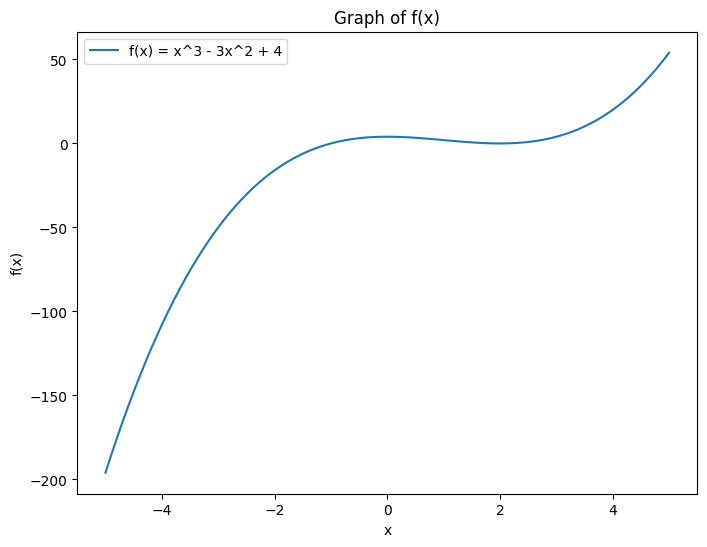

In [ ]:
# Define the function f(x)
def f(x):
    return x**3 - 3*x**2 + 4

# Generate x values in the range [-5, 5]
x = torch.linspace(-5, 5, 100)
# calculate f(x)
y = f(x)

# Plot the graph of f(x)
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.numpy(), label='f(x) = x^3 - 3x^2 + 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.legend()
plt.show()

2. Draw the graph of $(x,f^{\prime}(x))$ for $x\in [-5, 5]$ using augograd in torch.


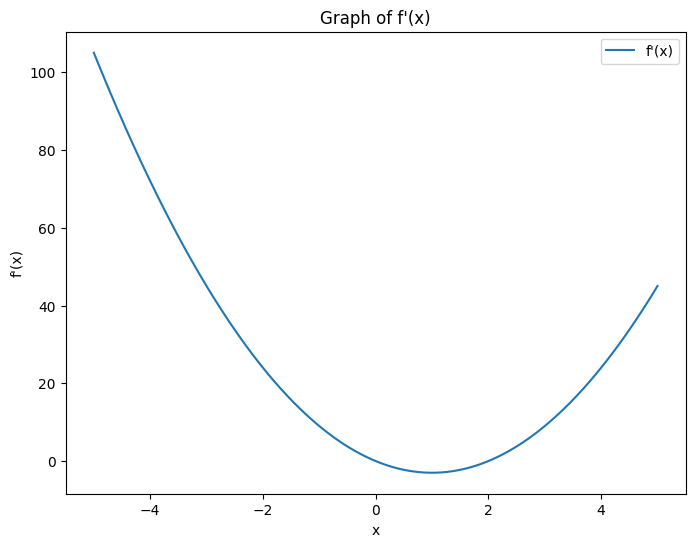

In [ ]:
# Define the function f(x)
def f(x):
    return x**3 - 3*x**2 + 4

# Generate x values in the range [-5, 5]
x = torch.linspace(-5, 5, 100)
x.requires_grad = True  # Enable gradients for x

# Calculate f(x)
y = f(x)

# Calculate the gradient of the sum of f(x) with respect to x
grad_f = autograd.grad(torch.sum(y), x, create_graph=True)[0]

# Plot the graph of f'(x)
plt.figure(figsize=(8, 6))
plt.plot(x.detach().numpy(), grad_f.detach().numpy(), label="f'(x)")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Graph of f'(x)")
plt.legend()
plt.show()
